In [1]:
"""
Created on Mon Apr 15 19:43:04 2019

Updated on Wed Jan 29 10:18:09 2020

@author: created by Sowmya Myneni and updated by Dijiang Huang
"""

'\nCreated on Mon Apr 15 19:43:04 2019\n\nUpdated on Wed Jan 29 10:18:09 2020\n\n@author: created by Sowmya Myneni and updated by Dijiang Huang\n'

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

2024-12-06 10:45:02.246067: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available: 0


In [3]:
import os
import multiprocessing

# Number of logical CPUs
num_cores = multiprocessing.cpu_count()
print(f"Number of CPU cores available: {num_cores}")

Number of CPU cores available: 12


In [4]:
# Configure TensorFlow to use all available CPU cores
tf.config.threading.set_intra_op_parallelism_threads(0)  # Use all intra-operation threads
tf.config.threading.set_inter_op_parallelism_threads(0)  # Use all inter-operation threads

# Part 1 - Data Pre-Processing

In [5]:
########################################
# Part 1 - Data Pre-Processing
#######################################

# To load a dataset file in Python, you can use Pandas. Import pandas using the line below
import pandas as pd
# Import numpy to perform operations on the dataset
import numpy as np

## Variable Setup

In [6]:
# Variable Setup
# Available datasets: KDDTrain+.txt, KDDTest+.txt, etc. More read Data Set Introduction.html within the NSL-KDD dataset folder
# Type the training dataset file name in ''
#TrainingDataPath='NSL-KDD/'
#TrainingData='KDDTrain+_20Percent.txt'
# Batch Size
BatchSize=10
# Epohe Size
NumEpoch=10

## Import Training Dataset

In [7]:
# Import dataset.
# Dataset is given in TraningData variable You can replace it with the file 
# path such as “C:\Users\...\dataset.csv’. 
# The file can be a .txt as well. 
# If the dataset file has header, then keep header=0 otherwise use header=none
# reference: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
dataset_train = pd.read_csv('Training-a1-a2.csv', header=None)

In [8]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124926 entries, 0 to 124925
Data columns (total 43 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       124926 non-null  int64  
 1   1       124926 non-null  object 
 2   2       124926 non-null  object 
 3   3       124926 non-null  object 
 4   4       124926 non-null  int64  
 5   5       124926 non-null  int64  
 6   6       124926 non-null  int64  
 7   7       124926 non-null  int64  
 8   8       124926 non-null  int64  
 9   9       124926 non-null  int64  
 10  10      124926 non-null  int64  
 11  11      124926 non-null  int64  
 12  12      124926 non-null  int64  
 13  13      124926 non-null  int64  
 14  14      124926 non-null  int64  
 15  15      124926 non-null  int64  
 16  16      124926 non-null  int64  
 17  17      124926 non-null  int64  
 18  18      124926 non-null  int64  
 19  19      124926 non-null  int64  
 20  20      124926 non-null  int64  
 21  21      12

In [9]:
dataset_train.describe()

,0,4,5,6,7,8,9,10,11,12,...,32,33,34,35,36,37,38,39,40,42
count,124926.000000,1.249260e+05,1.249260e+05,124926.000000,124926.000000,124926.000000,124926.000000,124926.000000,124926.000000,124926.000000,...,124926.000000,124926.000000,124926.000000,124926.000000,124926.000000,124926.000000,124926.000000,124926.000000,124926.000000,124926.000000
mean,284.472520,4.349730e+04,1.929105e+04,0.000200,0.022878,0.000080,0.139154,0.000776,0.391408,0.280470,...,116.280150,0.519492,0.083460,0.144632,0.032099,0.286646,0.280689,0.119404,0.120862,19.587012
std,2607.625097,5.893836e+06,4.037690e+06,0.014145,0.254582,0.012653,1.706081,0.038056,0.488067,24.041762,...,110.904962,0.449183,0.189509,0.304515,0.112446,0.445918,0.446814,0.307232,0.320212,2.078360
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,64.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
75%,0.000000,2.680000e+02,5.080000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,4.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


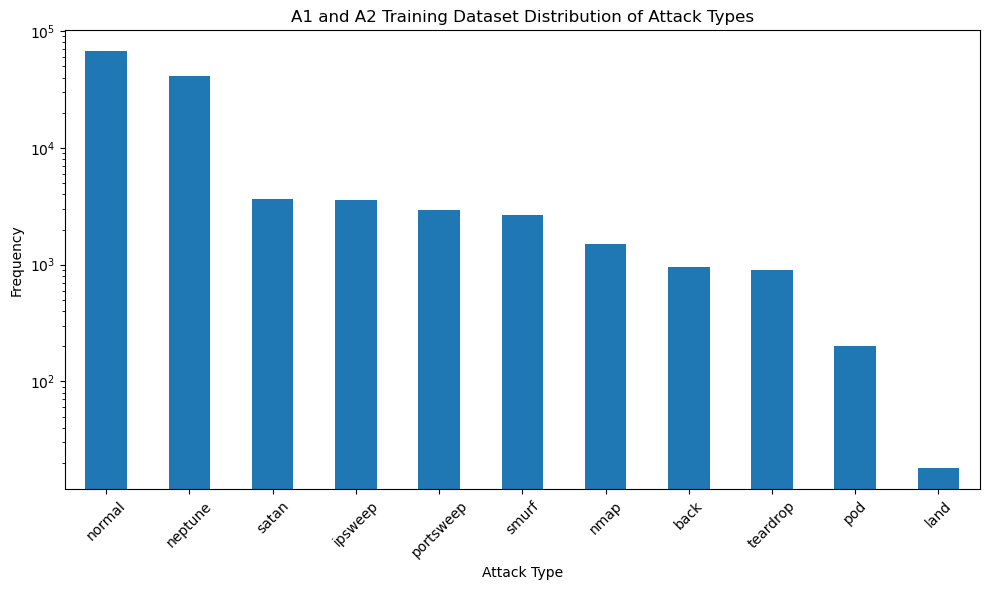

In [65]:
# Identify the column that contains the attack types
# Assuming the column with attack types is named based on the sample data ("neptune", "normal", etc.)
attack_column = dataset_train.columns[-2]  # Second last column seems to have attack types

# Calculate the frequency of each attack type
attack_distribution = dataset_train[attack_column].value_counts()

plt.figure(figsize=(10, 6))
attack_distribution.plot(kind='bar', logy=True)
plt.title('A1 and A2 Training Dataset Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
X_train = dataset_train.iloc[:, 0:-2].values
X_train

array([[0, 'tcp', 'ftp_data', ..., 0.0, 0.05, 0.0],
       [0, 'udp', 'other', ..., 0.0, 0.0, 0.0],
       [0, 'tcp', 'private', ..., 1.0, 0.0, 0.0],
       ...,
       [0, 'tcp', 'smtp', ..., 0.0, 0.01, 0.0],
       [0, 'tcp', 'klogin', ..., 1.0, 0.0, 0.0],
       [0, 'tcp', 'ftp_data', ..., 0.0, 0.0, 0.0]], dtype=object)

In [11]:
X_train.shape

(124926, 41)

In [12]:
label_column_train = dataset_train.iloc[:, -2].values
label_column_train

array(['normal', 'normal', 'neptune', ..., 'normal', 'neptune', 'normal'],
      dtype=object)

In [13]:
y_train = []
for i in range(len(label_column_train)):
    if label_column_train[i] == 'normal':
        y_train.append(0)
    else:
        y_train.append(1)

# Convert list to array
y_train = np.array(y_train)

In [14]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

In [15]:
y_train.shape

(124926,)

## Import Testing Dataset

In [16]:
# Import dataset.
# Dataset is given in TraningData variable You can replace it with the file 
# path such as “C:\Users\...\dataset.csv’. 
# The file can be a .txt as well. 
# If the dataset file has header, then keep header=0 otherwise use header=none
# reference: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
dataset_test = pd.read_csv('Testing-a1.csv', header=None)

In [17]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17171 entries, 0 to 17170
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       17171 non-null  int64  
 1   1       17171 non-null  object 
 2   2       17171 non-null  object 
 3   3       17171 non-null  object 
 4   4       17171 non-null  int64  
 5   5       17171 non-null  int64  
 6   6       17171 non-null  int64  
 7   7       17171 non-null  int64  
 8   8       17171 non-null  int64  
 9   9       17171 non-null  int64  
 10  10      17171 non-null  int64  
 11  11      17171 non-null  int64  
 12  12      17171 non-null  int64  
 13  13      17171 non-null  int64  
 14  14      17171 non-null  int64  
 15  15      17171 non-null  int64  
 16  16      17171 non-null  int64  
 17  17      17171 non-null  int64  
 18  18      17171 non-null  int64  
 19  19      17171 non-null  int64  
 20  20      17171 non-null  int64  
 21  21      17171 non-null  int64  
 22

In [18]:
dataset_test.describe()

,0,4,5,6,7,8,9,10,11,12,...,32,33,34,35,36,37,38,39,40,42
count,17171.000000,1.717100e+04,1.717100e+04,17171.000000,17171.000000,17171.0,17171.000000,17171.000000,17171.000000,17171.000000,...,17171.000000,17171.000000,17171.000000,17171.000000,17171.000000,17171.000000,17171.000000,17171.000000,17171.000000,17171.000000
mean,270.018112,4.320031e+03,2.530648e+03,0.000408,0.011065,0.0,0.068022,0.000641,0.494729,0.125386,...,159.461359,0.655854,0.044770,0.106977,0.011414,0.108826,0.112524,0.225771,0.207835,19.379535
std,1545.696480,6.518520e+04,2.369919e+04,0.020187,0.163305,0.0,0.984106,0.041092,0.499987,8.192348,...,110.966465,0.432480,0.112259,0.270587,0.042178,0.288290,0.295918,0.391089,0.390113,2.977430
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,17.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,2.050000e+02,7.600000e+01,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,245.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
75%,0.000000,3.080000e+02,1.255000e+03,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.020000,0.010000,0.000000,0.000000,0.260000,0.060000,21.000000
max,54451.000000,6.291668e+06,1.345927e+06,1.000000,3.000000,0.0,101.000000,3.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


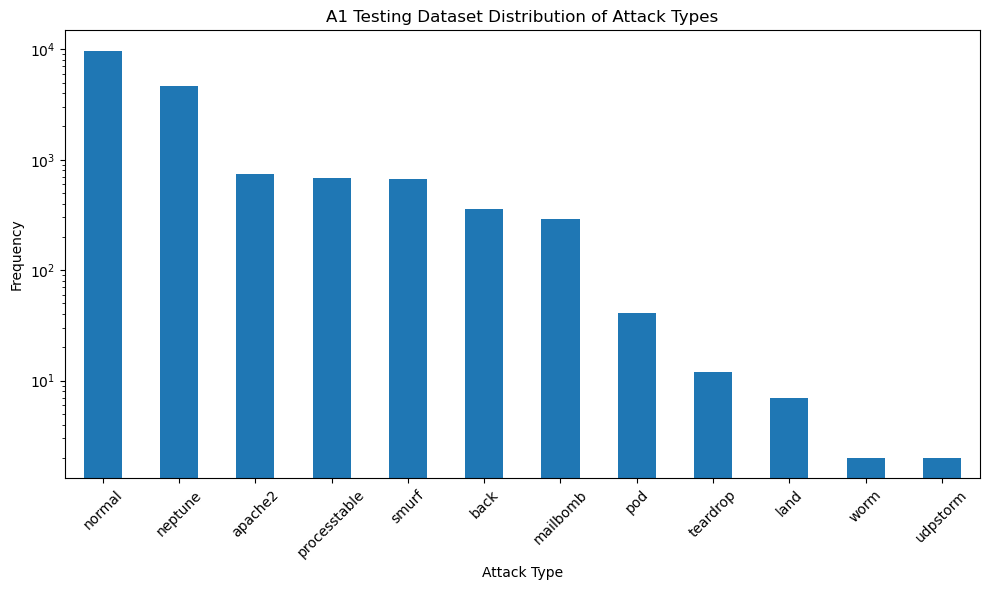

In [66]:
# Identify the column that contains the attack types
# Assuming the column with attack types is named based on the sample data ("neptune", "normal", etc.)
attack_column = dataset_test.columns[-2]  # Second last column seems to have attack types

# Calculate the frequency of each attack type
attack_distribution = dataset_test[attack_column].value_counts()

plt.figure(figsize=(10, 6))
attack_distribution.plot(kind='bar', logy=True)
plt.title('A1 Testing Dataset Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
X_test = dataset_test.iloc[:, 0:-2].values
X_test

array([[0, 'tcp', 'private', ..., 0.0, 1.0, 1.0],
       [0, 'tcp', 'private', ..., 0.0, 1.0, 1.0],
       [2, 'tcp', 'ftp_data', ..., 0.0, 0.0, 0.0],
       ...,
       [0, 'tcp', 'http', ..., 0.0, 0.0, 0.0],
       [0, 'tcp', 'http', ..., 0.0, 0.07, 0.07],
       [0, 'udp', 'domain_u', ..., 0.0, 0.0, 0.0]], dtype=object)

In [20]:
X_test.shape

(17171, 41)

In [21]:
label_column_test = dataset_test.iloc[:, -2].values
label_column_test

array(['neptune', 'neptune', 'normal', ..., 'normal', 'back', 'normal'],
      dtype=object)

In [22]:
y_test = []
for i in range(len(label_column_test)):
    if label_column_test[i] == 'normal':
        y_test.append(0)
    else:
        y_test.append(1)

# Convert list to array
y_test = np.array(y_test)

In [23]:
y_test

array([1, 1, 0, ..., 0, 1, 0])

## Encoding categorical data (convert letters/words in numbers)

In [24]:
# The following code work Python 3.7 or newer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
     # The column numbers to be transformed ([1, 2, 3] represents three columns to be transferred)
    [('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), [1,2,3])],
    # Leave the rest of the columns untouched
    remainder='passthrough'
)
X_train = np.array(ct.fit_transform(X_train), dtype=np.float64)
X_test  = np.array(ct.transform(X_test) , dtype=np.float64)

In [25]:
X_train

array([[0.  , 1.  , 0.  , ..., 0.  , 0.05, 0.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 1.  , 0.  , 0.  ],
       ...,
       [0.  , 1.  , 0.  , ..., 0.  , 0.01, 0.  ],
       [0.  , 1.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [26]:
X_train[0]

array([0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
       0.00e+00, 4.91e+02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e

In [27]:
X_train.shape

(124926, 122)

In [28]:
X_test

array([[0.  , 1.  , 0.  , ..., 0.  , 1.  , 1.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 1.  , 1.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.07, 0.07],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ]])

In [29]:
X_test.shape

(17171, 122)

## Perform feature scaling

In [30]:
# Perform feature scaling. For ANN you can use StandardScaler, for RNNs recommended is 
# MinMaxScaler. 
# referece: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Scaling to the range [0,1]
X_test  = sc.fit_transform(X_test)

In [31]:
X_train

array([[-0.26661772,  0.47858359, -0.3692588 , ..., -0.6282041 ,
        -0.225902  , -0.3774467 ],
       [-0.26661772, -2.08949913,  2.70812776, ..., -0.6282041 ,
        -0.38864593, -0.3774467 ],
       [-0.26661772,  0.47858359, -0.3692588 , ...,  1.60987176,
        -0.38864593, -0.3774467 ],
       ...,
       [-0.26661772,  0.47858359, -0.3692588 , ..., -0.6282041 ,
        -0.35609714, -0.3774467 ],
       [-0.26661772,  0.47858359, -0.3692588 , ...,  1.60987176,
        -0.38864593, -0.3774467 ],
       [-0.26661772,  0.47858359, -0.3692588 , ..., -0.6282041 ,
        -0.38864593, -0.3774467 ]])

In [32]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

# Part 2: Building FNN

In [33]:
########################################
# Part 2: Building FNN
#######################################

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Input

## Initialising the ANN

In [34]:
# Initialising the ANN
# Reference: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
classifier = Sequential()
classifier

<Sequential name=sequential, built=False>

## Adding the input layer and the first hidden layer, 6 nodes, input_dim specifies the number of variables

In [35]:
# Adding the input layer and the first hidden layer, 6 nodes, input_dim specifies the number of variables
# rectified linear unit activation function relu, reference: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/
# Adding the input layer with Input() and the first hidden layer
classifier.add(Input(shape=(len(X_train[0]),)))  # Input layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

## Compiling the ANN

In [36]:
# Compiling the ANN, 

# Gradient descent algorithm “adam“, Reference: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

# This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“, Reference: https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Fitting the ANN to the Training set

In [37]:
# Fitting the ANN to the Training set
# Train the model so that it learns a good (or good enough) mapping of rows of input data to the output classification.
# add verbose=0 to turn off the progress report during the training
# To run the whole training dataset as one Batch, assign batch size: BatchSize=X_train.shape[0]
#classifierHistory = classifier.fit(X_train, y_train, batch_size = BatchSize, epochs = NumEpoch)

## Save the Fitted Model

In [38]:
#classifier.save("fitted_FNN_model_SB.keras")  # Save the model in HDF5 format

# Save the history
#import json
#with open("fitted_FNN_model_history_SB.json", "w") as f:
#    json.dump(classifierHistory.history, f)

## Load the Model if Necessary

In [43]:
from keras.models import load_model

classifier = load_model("fitted_FNN_model_SB.keras")  # Load the saved model

# Load the history
import json
with open("fitted_FNN_model_history_SB.json", "r") as f:
    classifierHistory = json.load(f)

In [44]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │           738 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,363 (9.23 KB)

 Trainable params: 787 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,576 (6.16 KB)

## Evaluate the keras model for the provided model and dataset

In [45]:
from sklearn.metrics import classification_report

### Training Loss and Accuracy

In [46]:
loss_train, accuracy_train = classifier.evaluate(X_train, y_train)

3904/3904 ━━━━━━━━━━━━━━━━━━━━ 162s 41ms/step - accuracy: 0.9899 - loss: 0.0241


In [47]:
print('Print the training loss and the accuracy of the model on the dataset')
print('Loss [0,1]: {0:0.4f} Accuracy [0,1]: {1:0.4f}'.format(loss_train, accuracy_train))

Print the training loss and the accuracy of the model on the dataset
Loss [0,1]: 0.0244 Accuracy [0,1]: 0.9898


### Testing Loss and Accuracy

In [48]:
loss_test, accuracy_test = classifier.evaluate(X_test, y_test)

537/537 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8679 - loss: 1.3323


In [49]:
print('Print the testing loss and the accuracy of the model on the dataset')
print('Loss [0,1]: {0:0.4f} Accuracy [0,1]: {1:0.4f}'.format(loss_test, accuracy_test))

Print the testing loss and the accuracy of the model on the dataset
Loss [0,1]: 1.3307 Accuracy [0,1]: 0.8693


# Part 3 - Making predictions and evaluating the model

In [50]:
########################################
# Part 3 - Making predictions and evaluating the model
#######################################

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.9)   # y_pred is 0 if less than 0.9 or equal to 0.9, y_pred is 1 if it is greater than 0.9

537/537 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step


In [51]:
y_pred.shape

(17171, 1)

In [52]:
y_pred[:5]

array([[ True],
       [ True],
       [False],
       [False],
       [ True]])

In [53]:
y_test[:5]

array([1, 1, 0, 0, 0])

In [54]:
# summarize the first 5 cases
for i in range(10):
    print('{} (expected {})'.format(y_pred[i], y_test[i]))

[ True] (expected 1)
[ True] (expected 1)
[False] (expected 0)
[False] (expected 0)
[ True] (expected 0)
[False] (expected 0)
[False] (expected 0)
[ True] (expected 1)
[ True] (expected 1)
[ True] (expected 0)


## Making the Confusion Matrix

Print the Confusion Matrix:
[ TN, FP ]
[ FN, TP ]=
[[8746  965]
 [1558 5902]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      9711
           1       0.86      0.79      0.82      7460

    accuracy                           0.85     17171
   macro avg       0.85      0.85      0.85     17171
weighted avg       0.85      0.85      0.85     17171



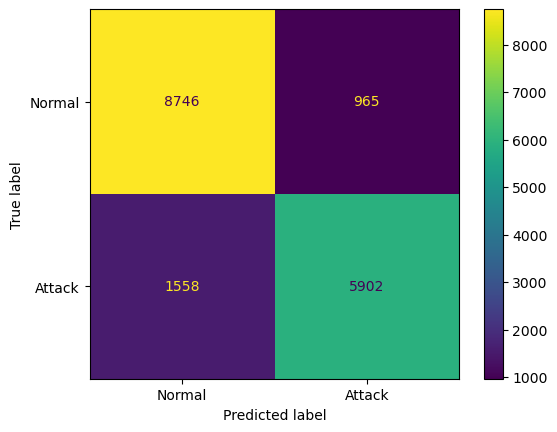

In [63]:
# Making the Confusion Matrix
# [TN, FP ]
# [FN, TP ]
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print('Print the Confusion Matrix:')
print('[ TN, FP ]')
print('[ FN, TP ]=')
print(cm)
print(classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Attack'])
disp.plot()
plt.savefig('confusion_matrix_SB.png')
plt.show()

# Part 4 - Visualizing

## Receiver Operating Characteristic (ROC) Curve and Area Under Curve (AUC)

537/537 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step


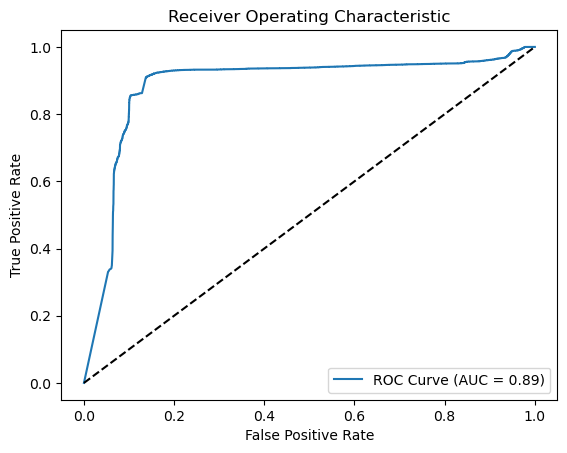

In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate probabilities
y_pred_prob = classifier.predict(X_test).ravel()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('ROC_SB.png')
plt.show()

## Plot the accuracy

Plot the accuracy


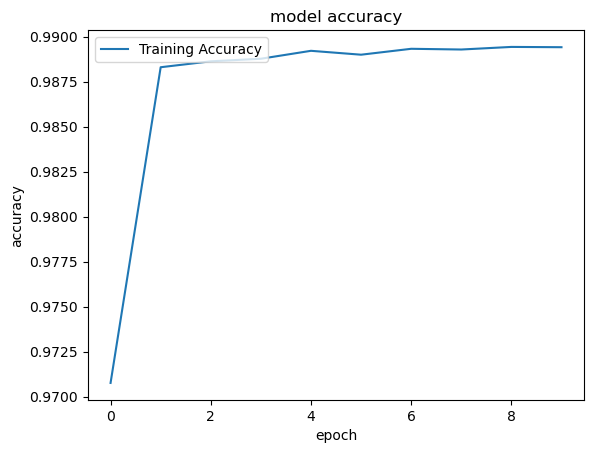

In [61]:
########################################
# Part 4 - Visualizing
#######################################

# Import matplot lib libraries for plotting the figures. 
import matplotlib.pyplot as plt

# You can plot the accuracy
print('Plot the accuracy')
# Keras 2.2.4 recognizes 'acc' and 2.3.1 recognizes 'accuracy'
# use the command python -c 'import keras; print(keras.__version__)' on MAC or Linux to check Keras' version
#plt.plot(classifierHistory.history['accuracy'], label='Training Accuracy')
plt.plot(classifierHistory['accuracy'], label='Training Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.savefig('accuracy_sample_SB.png')
plt.show()

## Plot the Loss

Plot the loss


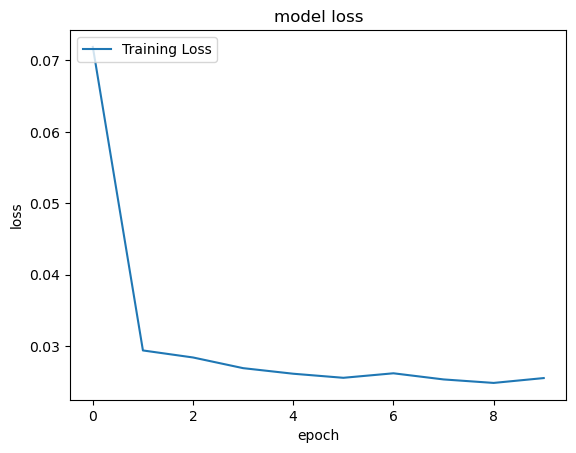

In [62]:
# You can plot history for loss
print('Plot the loss')
#plt.plot(classifierHistory.history['loss'], label='Training Loss')
plt.plot(classifierHistory['loss'], label='Training Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.savefig('loss_sample_SB.png')
plt.show()